In [1]:
# Task 1: Use any two ML models to predict whether the income will be >50k or <=50k
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
train = pd.read_csv('adult_trdata.csv', header=None)
test = pd.read_csv('adult_test.csv', skiprows=[0], header=None)
df = pd.concat([train, test])
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
    'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [3]:
#check whether there are missing values, we can see all the values are non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [4]:
#check the unique value counts and find we need to optimize the variable of income
df.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [5]:
df['income'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [6]:
df = df.replace([' <=50K', ' <=50K.'], 0)
df = df.replace([' >50K', ' >50K.'], 1)

In [7]:
df['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

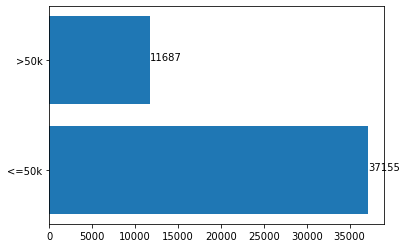

In [8]:
# data visualization for income count, we can see most people's income is under 50k
income = ['<=50k', '>50k']
count = [37155, 11687]
plt.barh(income, count)
for index, value in enumerate(count):
    plt.text(value, index, str(value))

In [9]:
df_object = df[['workclass', 'education', 'marital-status', 'occupation', 
                'relationship', 'race', 'sex', 'native-country']]
df_int = df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
df_object_array = OneHotEncoder().fit_transform(df_object).toarray()
df_array = np.concatenate((df_object_array, df_int), axis=1)
df_label = df[['income']]
train_data = df_array[:32561]
train_label = df_label[:32561]
test_data = df_array[32561:]
test_label = df_label[32561:]

In [10]:
# ML model 1: use decision tree to classify
from sklearn import tree
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(train_data, train_label)
predict1 = clf1.predict(test_data)
'Accuracy: {0}'.format((predict1 == test_label['income'].to_numpy()).sum() / len(test_data))

'Accuracy: 0.8108224310546035'

In [11]:
# ML model 2: use MLP neural network to classify
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier()
clf2.fit(train_data, train_label['income'].to_numpy())
predict2 = clf2.predict(test_data)
'Accuracy: {0}'.format((predict2 == test_label['income'].to_numpy()).sum() / len(test_data))

'Accuracy: 0.7996437565260119'

In [12]:
# Task 2: set up an endpoint API for predicting the result from your best ML model
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
class api:
    def classifier(self, single_row_data_index):
        train = pd.read_csv('adult_trdata.csv', header=None)
        test = pd.read_csv('adult_test.csv', skiprows=[0], header=None)
        df = pd.concat([train, test])
        df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
                        'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                        'hours-per-week', 'native-country', 'income']
        df = df.replace([' <=50K', ' <=50K.'], 0)
        df = df.replace([' >50K', ' >50K.'], 1)
        df_object = df[['workclass', 'education', 'marital-status', 'occupation', 
                        'relationship', 'race', 'sex', 'native-country']]
        df_int = df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
        df_object_array = OneHotEncoder().fit_transform(df_object).toarray()
        df_array = np.concatenate((df_object_array, df_int), axis=1)
        df_label = df[['income']]
        train_data = df_array[:32561]
        train_label = df_label[:32561]
        test_data = df_array[32561:]
        # test_label = df_label[32561:]
        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(train_data, train_label)
        predict = clf.predict([test_data[single_row_data_index]])
        # (predict == test_label['income'].to_numpy()).sum() / len(test_data)
        return predict
api = api()

In [13]:
# We can use index 0 row as our example to be the input
test = pd.read_csv('adult_test.csv', skiprows=[0], header=None)
test.iloc[0]

0                     25
1                Private
2                 226802
3                   11th
4                      7
5          Never-married
6      Machine-op-inspct
7              Own-child
8                  Black
9                   Male
10                     0
11                     0
12                    40
13         United-States
14                <=50K.
Name: 0, dtype: object

In [14]:
# We can see that the prediction of our api is 0, which means for this row, its income is <=50k
api.classifier(0)

array([0])